# Real Estate

### Project Steps

1. Load the new data
2. Check and review the info
3. Check and handle inappropriate data (nulls, zeroes, etc...)
4. Outliers
5. categorical variables - num 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('test.csv')
df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [20]:
df.tail(10)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
11699,277257,NaN,140,67,42,Pennsylvania,PA,Port Royal,Port Royal,Borough,...,43.75168,45.58333,23.25633,758.38916,3117.0,0.76271,0.61301,0.03854,0.01967,0.07627
11700,229963,NaN,140,73,6,California,CA,Lakeside,Lakeside,City,...,41.68479,44.16667,23.10359,537.18614,2123.0,0.76566,0.55587,0.01741,0.00000,0.11286
11701,263196,NaN,140,7,34,New Jersey,NJ,Clementon,Clementon,City,...,40.02122,41.25000,21.61202,648.34225,2639.0,0.74477,0.44361,0.02632,0.02148,0.10043
11702,264639,NaN,140,39,34,New Jersey,NJ,Hillside,Elizabeth City,City,...,39.46590,40.08333,22.75990,817.25219,2921.0,0.77672,0.49662,0.02834,0.00381,0.06937
11703,228070,NaN,140,59,6,California,CA,Tustin,North Tustin,City,...,41.27858,43.50000,23.18296,893.44428,3631.0,0.96410,0.65309,0.05792,0.00477,0.07257
11704,238088,NaN,140,105,12,Florida,FL,Lakeland,Crystal Springs,City,...,53.51255,59.58333,23.23426,699.33353,2914.0,0.93121,0.65969,0.02135,0.02135,0.08780
11705,242811,NaN,140,31,17,Illinois,IL,Chicago,Chicago City,Village,...,33.14169,32.83333,20.24698,306.63915,1191.0,0.33122,0.42882,0.07781,0.02829,0.05305
11706,250127,NaN,140,9,25,Massachusetts,MA,Lawrence,Methuen Town City,City,...,43.53905,43.66667,23.17995,900.13903,3723.0,0.84372,0.50269,0.00108,0.00108,0.07294
11707,241096,NaN,140,27,19,Iowa,IA,Carroll,Carroll City,City,...,45.63179,48.16667,24.84209,693.82905,3213.0,0.83330,0.66699,0.02738,0.00000,0.04694
11708,287763,NaN,140,453,48,Texas,TX,Austin,Sunset Valley City,Town,...,35.99955,35.41667,20.68049,559.30291,2047.0,0.52587,0.51922,0.08066,0.02520,0.10586


In [21]:
df.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11709.000000,0.0,11709.0,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,1.170900e+04,...,11613.000000,11613.000000,11613.000000,11613.000000,11613.000000,11587.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,257525.004783,NaN,140.0,85.710650,28.489196,50123.418396,593.598514,37.405491,-91.340229,1.095500e+08,...,40.111999,40.131864,22.148145,550.411243,2233.003186,0.634194,0.505632,0.047960,0.019346,0.099191
std,21466.372658,NaN,0.0,99.304334,16.607262,29775.134038,232.074263,5.625904,16.407818,7.624940e+08,...,5.851192,7.972026,2.554907,280.992521,1072.017063,0.232232,0.139774,0.038693,0.021428,0.048525
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,...,15.360240,12.833330,0.737110,0.251910,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238819.000000,NaN,140.0,29.000000,13.000000,25570.000000,404.000000,33.919813,-97.816561,1.718660e+06,...,36.729210,34.750000,21.270920,363.225840,1499.000000,0.492500,0.422020,0.020890,0.004500,0.064590
50%,257651.000000,NaN,140.0,61.000000,28.000000,47362.000000,612.000000,38.618093,-86.643344,4.835000e+06,...,40.196960,40.333330,22.472990,509.103610,2099.000000,0.687640,0.525270,0.038680,0.013870,0.094350
75%,276300.000000,NaN,140.0,109.000000,42.000000,77406.000000,787.000000,41.232973,-79.697311,3.204540e+07,...,43.496490,45.333330,23.549450,685.883910,2800.000000,0.815235,0.605660,0.065340,0.027910,0.128400
max,294333.000000,NaN,140.0,810.000000,72.000000,99929.000000,989.000000,64.804269,-65.695344,5.520166e+10,...,90.107940,90.166670,29.626680,4145.557870,15466.000000,1.000000,1.000000,0.714290,0.714290,0.362750


In [22]:
df.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)

In [23]:
df

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,238088,105,12,Florida,FL,Lakeland,Crystal Springs,City,tract,33810,...,53.51255,59.58333,23.23426,699.33353,2914.0,0.93121,0.65969,0.02135,0.02135,0.08780
11705,242811,31,17,Illinois,IL,Chicago,Chicago City,Village,tract,60609,...,33.14169,32.83333,20.24698,306.63915,1191.0,0.33122,0.42882,0.07781,0.02829,0.05305
11706,250127,9,25,Massachusetts,MA,Lawrence,Methuen Town City,City,tract,1841,...,43.53905,43.66667,23.17995,900.13903,3723.0,0.84372,0.50269,0.00108,0.00108,0.07294
11707,241096,27,19,Iowa,IA,Carroll,Carroll City,City,tract,51401,...,45.63179,48.16667,24.84209,693.82905,3213.0,0.83330,0.66699,0.02738,0.00000,0.04694


In [24]:
df.isnull().sum().sum()

9189

In [25]:
df = df.dropna()
df

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,238088,105,12,Florida,FL,Lakeland,Crystal Springs,City,tract,33810,...,53.51255,59.58333,23.23426,699.33353,2914.0,0.93121,0.65969,0.02135,0.02135,0.08780
11705,242811,31,17,Illinois,IL,Chicago,Chicago City,Village,tract,60609,...,33.14169,32.83333,20.24698,306.63915,1191.0,0.33122,0.42882,0.07781,0.02829,0.05305
11706,250127,9,25,Massachusetts,MA,Lawrence,Methuen Town City,City,tract,1841,...,43.53905,43.66667,23.17995,900.13903,3723.0,0.84372,0.50269,0.00108,0.00108,0.07294
11707,241096,27,19,Iowa,IA,Carroll,Carroll City,City,tract,51401,...,45.63179,48.16667,24.84209,693.82905,3213.0,0.83330,0.66699,0.02738,0.00000,0.04694


In [26]:
df.set_index(keys=['UID'], inplace=True)

In [27]:
df.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [28]:
df2 = df[['place', 'pct_own', 'second_mortgage', 'lat', 'lng']][(df['pct_own']>0.1)&(df['second_mortgage']<=0.5)]
df2

,place,pct_own,second_mortgage,lat,lng
UID,,,,,
255504,Dearborn Heights City,0.70252,0.06443,42.346422,-83.252823
252676,Auburn City,0.85128,0.01175,44.100724,-70.257832
276314,Millerton,0.81897,0.01316,41.948556,-76.783808
248614,Monticello City,0.84609,0.00995,36.746009,-84.766870
286865,Edroy,0.79077,0.00000,27.882462,-97.678586
...,...,...,...,...,...
238088,Crystal Springs,0.93121,0.03619,28.226068,-82.068886
242811,Chicago City,0.33122,0.05909,41.804936,-87.667304
250127,Methuen Town City,0.84372,0.02727,42.737778,-71.131761


In [29]:
df2 = df2.sort_values(by='second_mortgage',ascending=False)
df3 = df2.head(2500)
df3

,place,pct_own,second_mortgage,lat,lng
UID,,,,,
252317,Adelphi,0.13342,0.28488,39.006934,-76.974603
278176,Millbourne,0.25709,0.26036,39.953811,-75.207043
289183,Ravensworth,0.23841,0.24595,38.822025,-77.217828
228916,Parkway,0.28592,0.24528,38.500214,-121.439483
251009,Milton,0.39953,0.24103,42.284800,-71.085722
...,...,...,...,...,...
231871,Simi Valley City,0.52899,0.04668,34.277896,-118.769729
279874,Warwick City,0.90119,0.04667,41.739774,-71.387096
246313,Crawfordsville City,0.60580,0.04664,40.049004,-86.908052


In [30]:
df['lat']

UID
255504    42.346422
252676    44.100724
276314    41.948556
248614    36.746009
286865    27.882462
            ...    
238088    28.226068
242811    41.804936
250127    42.737778
241096    42.081366
287763    30.219013
Name: lat, Length: 11355, dtype: float64

In [31]:
import plotly.graph_objects as go 

fig = go.Figure(data=go.Scattergeo(lat=df3['lat'], lon=df3['lng'] , text=df3['place'], marker_color=df3['pct_own'], marker_showscale=True), 
layout=dict(geo=dict(scope='usa'), title='Top 2,500 locations'))
fig

In [32]:
#Bad Debt = second_mortgage + home_equity home_equity_second_mortgage
df['bad_debt'] = df['second_mortgage'] + df['home_equity'] - df['home_equity_second_mortgage']
df.head(3)

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_17150/4004381399.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt
UID,,,,,,,,,,,,,,,,,,,,,
255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,...,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299,0.07651
252676,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,207,...,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377,0.14375
276314,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,607,...,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026,0.06744


In [33]:
df['good_debt'] = df['debt'] - df['bad_debt']

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_17150/3611514556.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
df['good_debt'].sum()

5973.27649

In [35]:
pieDebt = [df['good_debt'].sum(), df['bad_debt'].sum()]

In [36]:
type(pieDebt)

list

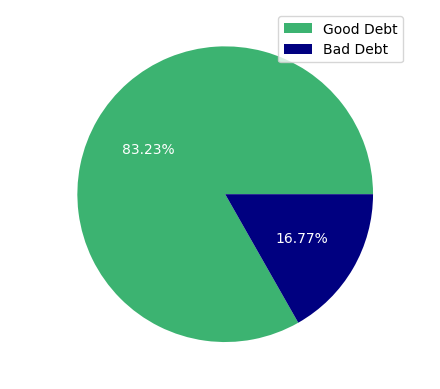

In [56]:
plt.pie(pieDebt, labels = ['Good Debt', 'Bad Debt'], autopct='%.2f%%', colors=['mediumseagreen','navy'], textprops={'color':'w'})
plt.legend()
plt.show()

In [38]:
df['city']

UID
255504           Detroit
252676            Auburn
276314         Pine City
248614        Monticello
286865    Corpus Christi
               ...      
238088          Lakeland
242811           Chicago
250127          Lawrence
241096           Carroll
287763            Austin
Name: city, Length: 11355, dtype: object

In [39]:
filter1 = df['city']=='Monticello' 
filter2 = df['city']=='Auburn'
dfC = df.where(filter1 | filter2).dropna()
dfC

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,good_debt
UID,,,,,,,,,,,,,,,,,,,,,
252676,1.0,23.0,Maine,ME,Auburn,Auburn City,City,tract,4210.0,207.0,...,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377,0.14375,0.50380
248614,231.0,21.0,Kentucky,KY,Monticello,Monticello City,City,tract,42633.0,606.0,...,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489,0.01741,0.40174
244850,167.0,17.0,Illinois,IL,Auburn,Auburn City,Village,tract,62615.0,217.0,...,22.78822,687.93475,3075.0,0.85780,0.56099,0.05585,0.03491,0.09897,0.12253,0.58706
238704,13.0,13.0,Georgia,GA,Auburn,Auburn City,City,tract,30011.0,678.0,...,20.66158,342.95799,1454.0,0.63582,0.59643,0.00714,0.00000,0.07768,0.14559,0.64853
221099,81.0,1.0,Alabama,AL,Auburn,Auburn City,Town,tract,36830.0,334.0,...,5.90285,904.70557,1509.0,0.06813,0.04164,0.00722,0.00000,0.00000,0.00000,0.83537
247410,177.0,20.0,Kansas,KS,Auburn,Auburn City,City,tract,66402.0,785.0,...,22.88356,566.28794,2374.0,0.88979,0.74078,0.05277,0.02254,0.08504,0.11588,0.60699
253116,17.0,26.0,Michigan,MI,Auburn,Auburn City,CDP,tract,48611.0,989.0,...,22.97225,868.05482,3790.0,0.86502,0.66434,0.01362,0.00000,0.04049,0.09091,0.46526
251200,27.0,25.0,Massachusetts,MA,Auburn,Worcester City,City,tract,1501.0,508.0,...,22.40722,393.69694,1589.0,0.84710,0.53184,0.00987,0.00000,0.15336,0.06918,0.63682
240086,159.0,13.0,Georgia,GA,Monticello,Mansfield City,City,tract,31064.0,706.0,...,23.01577,304.20737,1425.0,0.76635,0.58196,0.01746,0.01746,0.12124,0.10663,0.54226


<AxesSubplot: xlabel='second_mortgage', ylabel='city'>

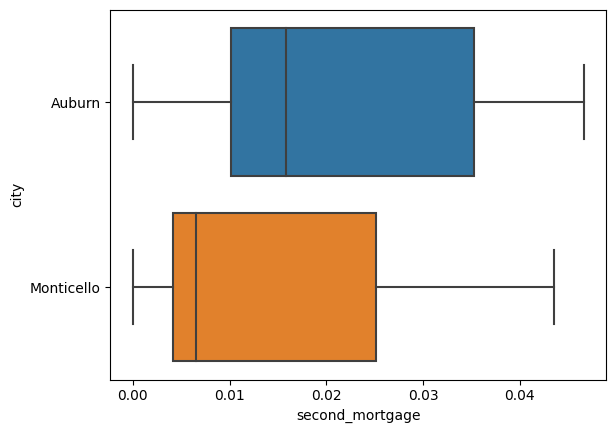

In [40]:
import seaborn as sns

sns.boxplot(x='second_mortgage', y='city', data=dfC)

In [41]:
df.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

<AxesSubplot: xlabel='family_mean', ylabel='Count'>

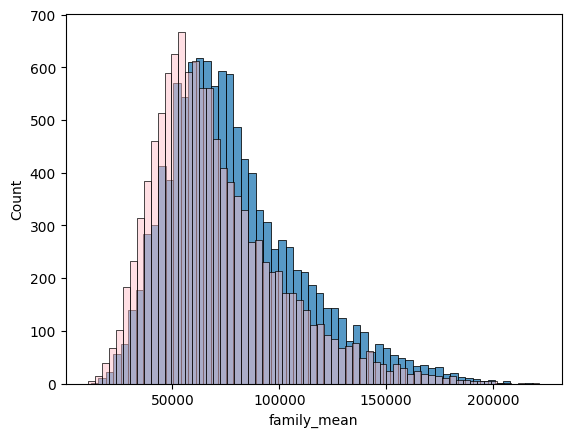

In [42]:
sns.histplot(df['family_mean'])
sns.histplot(df['hi_mean'], alpha=.5, color='pink')

In [43]:
df['pop_density'] = df['pop'] / df['ALand']
df.head()

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_17150/811310971.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,good_debt,pop_density
UID,,,,,,,,,,,,,,,,,,,,,
255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,...,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299,0.07651,0.55973,0.001260
252676,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,207,...,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377,0.14375,0.50380,0.000257
276314,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,607,...,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026,0.06744,0.38651,0.000015
248614,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,606,...,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489,0.01741,0.40174,0.000005
286865,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,361,...,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379,0.03440,0.59748,0.000452


In [44]:
df['pop_bins'] = pd.cut(df['pop'], bins=3)
df['pop_bins'].unique()

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_17150/2909984351.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[(9.112, 9667.333], (19296.667, 28926.0], (9667.333, 19296.667]]
Categories (3, interval[float64, right]): [(9.112, 9667.333] < (9667.333, 19296.667] < (19296.667, 28926.0]]

In [45]:
#group by bins and marriage status
df.groupby(by='pop_bins')[['married', 'separated', 'divorced']].mean()

,married,separated,divorced
pop_bins,,,
"(9.112, 9667.333]",0.508821,0.019246,0.100212
"(9667.333, 19296.667]",0.583175,0.013166,0.079272
"(19296.667, 28926.0]",0.597365,0.018644,0.070102


<AxesSubplot: xlabel='pop_bins'>

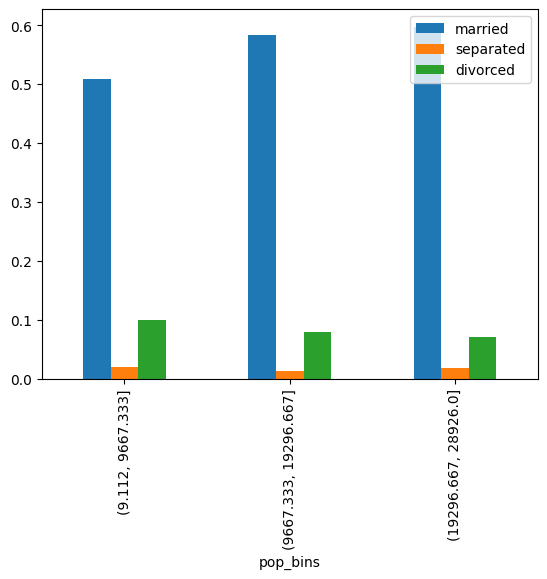

In [46]:
df.groupby(by='pop_bins')[['married', 'separated', 'divorced']].mean().plot(kind='bar')

In [47]:
df['rent_mean'].sum() / df['family_mean'].sum() * 100

1.3314271272141232

In [48]:
# find the correlation between second mortgage, bad debt, and family mean
dfCor = df[['second_mortgage', 'bad_debt', 'family_mean', 'home_equity']]
dfCor.head()

,second_mortgage,bad_debt,family_mean,home_equity
UID,,,,
255504,0.06443,0.07651,53802.87122,0.07651
252676,0.01175,0.14375,85642.22095,0.14375
276314,0.01316,0.06744,65694.06582,0.06497
248614,0.00995,0.01741,44156.38709,0.01741
286865,0.00000,0.03440,123527.02420,0.03440


In [49]:
dfCor.corr()

,second_mortgage,bad_debt,family_mean,home_equity
second_mortgage,1.000000,0.563276,0.071903,0.494361
bad_debt,0.563276,1.000000,0.485383,0.982521
family_mean,0.071903,0.485383,1.000000,0.492934
home_equity,0.494361,0.982521,0.492934,1.000000


<AxesSubplot: >

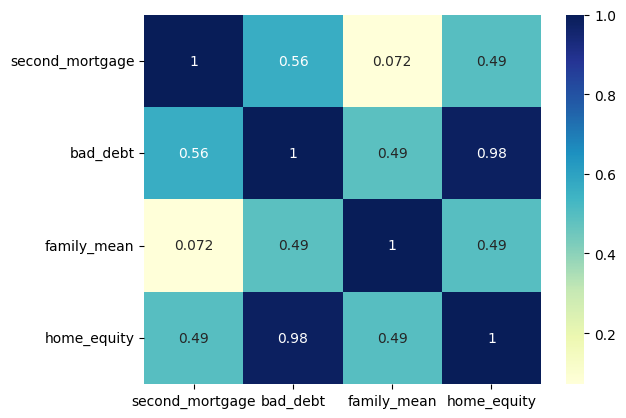

In [57]:
sns.heatmap(dfCor.corr(), annot=True, cmap='YlGnBu') 

In [99]:
df.to_csv('results.csv', sep='|')

In [60]:
df.isnull().sum().sum()

0

In [62]:
df['home_equity'].dtypes

dtype('float64')

In [63]:
df.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [65]:
df['median_age'] = (df['male_pop'] * df['male_age_median']) + (df['female_pop'] * df['female_age_median'])/(df['male_pop']*df['female_pop'])

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_17150/1526328950.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,pct_own,married,married_snp,separated,divorced,bad_debt,good_debt,pop_density,pop_bins,median_age
UID,,,,,,,,,,,,,,,,,,,,,
255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,...,0.70252,0.28217,0.05910,0.03813,0.14299,0.07651,0.55973,0.001260,"(9.112, 9667.333]",41165.517889
252676,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,207,...,0.85128,0.64221,0.02338,0.00000,0.13377,0.14375,0.50380,0.000257,"(9.112, 9667.333]",85069.852460
276314,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,607,...,0.81897,0.59961,0.01746,0.01358,0.10026,0.06744,0.38651,0.000015,"(9.112, 9667.333]",86557.945100
248614,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,606,...,0.84609,0.56953,0.05492,0.04694,0.12489,0.01741,0.40174,0.000005,"(9.112, 9667.333]",61361.033637
286865,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,361,...,0.79077,0.57620,0.01726,0.00588,0.16379,0.03440,0.59748,0.000452,"(9.112, 9667.333]",143237.513032


In [67]:
FA = df[['family_mean', 'divorced', 'married', 'home_equity', 'hs_degree', 'median_age', 'second_mortgage', 'pct_own', 'bad_debt']]
FA.head()

,family_mean,divorced,married,home_equity,hs_degree,median_age,second_mortgage,pct_own,bad_debt
UID,,,,,,,,,
255504,53802.87122,0.14299,0.28217,0.07651,0.91047,41165.517889,0.06443,0.70252,0.07651
252676,85642.22095,0.13377,0.64221,0.14375,0.94290,85069.852460,0.01175,0.85128,0.14375
276314,65694.06582,0.10026,0.59961,0.06497,0.89238,86557.945100,0.01316,0.81897,0.06744
248614,44156.38709,0.12489,0.56953,0.01741,0.60908,61361.033637,0.00995,0.84609,0.01741
286865,123527.02420,0.16379,0.57620,0.03440,0.86297,143237.513032,0.00000,0.79077,0.03440


In [68]:
from sklearn.preprocessing import StandardScaler
StScaler = StandardScaler()

In [69]:
ScaledData = StScaler.fit_transform(FA)

In [70]:
ScaledData.std()

1.0

In [71]:
from factor_analyzer import FactorAnalyzer

In [72]:
FactA = FactorAnalyzer(n_factors=8, rotation='varimax')

In [73]:
FactA.fit(ScaledData)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [74]:
FactA.loadings_

array([[ 2.30108303e-01,  2.75485980e-01,  7.26300630e-01,
         4.17473122e-01,  2.01636482e-01, -3.65457534e-02,
         1.86088310e-01, -3.49833252e-02],
       [-1.06854894e-01, -1.08356560e-01, -7.00995159e-02,
        -6.47359608e-01, -2.71648264e-02,  2.22088391e-03,
         1.77773980e-03, -2.76857253e-03],
       [ 3.37879094e-02,  8.25036698e-01,  1.93252949e-01,
         2.75132249e-01,  1.41684852e-01,  6.17155348e-04,
        -6.60437692e-02,  1.24215051e-01],
       [ 9.41414905e-01,  8.10549086e-02,  2.42180756e-01,
         1.44295091e-01,  6.88568846e-02, -1.33936400e-01,
        -4.59097085e-03,  2.30849779e-03],
       [ 1.81621161e-01,  2.81508118e-01,  7.40376202e-01,
        -9.36687662e-03,  3.26360529e-02, -1.21301554e-02,
        -7.58109731e-02,  1.67113441e-02],
       [ 6.98673535e-02,  3.09851478e-01,  9.43650524e-02,
         4.48960193e-02,  3.48852541e-01,  5.70655117e-03,
         2.95731857e-03,  4.09548523e-04],
       [ 5.98703052e-01, -4.890986

In [77]:
dfL = pd.DataFrame(FactA.loadings_, index=FA.columns)
dfL

,0,1,2,3,4,5,6,7
family_mean,0.230108,0.275486,0.726301,0.417473,0.201636,-0.036546,0.186088,-0.034983
divorced,-0.106855,-0.108357,-0.070100,-0.647360,-0.027165,0.002221,0.001778,-0.002769
married,0.033788,0.825037,0.193253,0.275132,0.141685,0.000617,-0.066044,0.124215
home_equity,0.941415,0.081055,0.242181,0.144295,0.068857,-0.133936,-0.004591,0.002308
hs_degree,0.181621,0.281508,0.740376,-0.009367,0.032636,-0.012130,-0.075811,0.016711
median_age,0.069867,0.309851,0.094365,0.044896,0.348853,0.005707,0.002957,0.000410
second_mortgage,0.598703,-0.048910,-0.052118,-0.007896,0.018339,0.394319,-0.002590,0.001259
pct_own,0.010413,0.797990,0.257351,0.014156,0.093349,-0.035808,0.063844,-0.101381
bad_debt,0.953442,0.074609,0.231577,0.150106,0.058763,0.021094,0.018292,-0.002593


In [78]:
FactA = FactorAnalyzer(n_factors=3, rotation='varimax')
FactA.fit(ScaledData)
dfL = pd.DataFrame(FactA.loadings_, index=FA.columns)
dfL

,0,1,2
family_mean,0.157066,0.308564,0.946746
divorced,-0.115364,-0.151554,-0.278283
married,0.008614,0.836776,0.265677
home_equity,0.892989,0.121659,0.345411
hs_degree,0.157554,0.327725,0.523344
median_age,0.061698,0.354631,0.134588
second_mortgage,0.586166,-0.040140,-0.019007
pct_own,-0.031133,0.778016,0.233309
bad_debt,0.949201,0.114754,0.320909


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


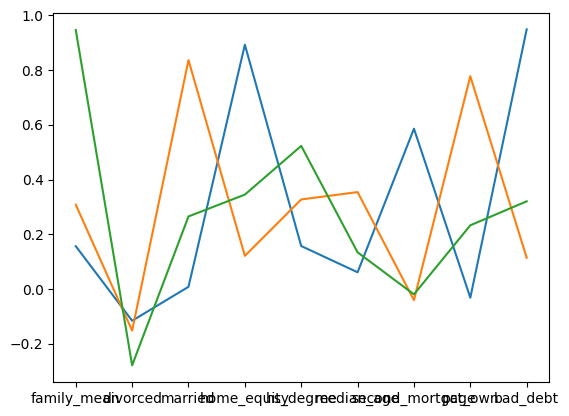

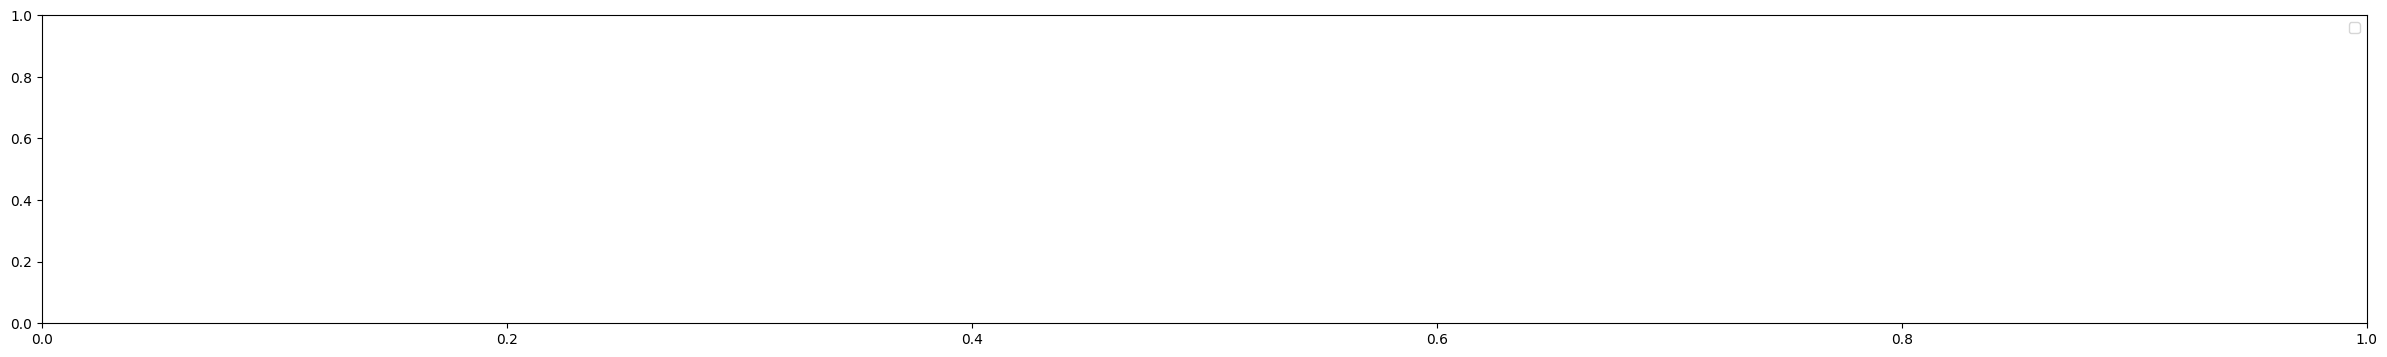

In [84]:
plt.plot(dfL)
plt.figure(figsize=(30,4))
plt.legend()
plt.show()

In [86]:
dfLinReg = df[['COUNTYID','STATEID', 'zip_code', 'type', 'pop', 'family_mean',
'second_mortgage', 'home_equity', 'debt', 'hs_degree', 'pct_own', 'married', 'separated', 'divorced','hc_mortgage_mean']]
dfLinReg.dtypes

COUNTYID              int64
STATEID               int64
zip_code              int64
type                 object
pop                   int64
family_mean         float64
second_mortgage     float64
home_equity         float64
debt                float64
hs_degree           float64
pct_own             float64
married             float64
separated           float64
divorced            float64
hc_mortgage_mean    float64
dtype: object

In [87]:
dfLinReg['type'].head()

UID
255504        CDP
252676       City
276314    Borough
248614       City
286865       Town
Name: type, dtype: object

In [88]:
dfLinReg.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced,hc_mortgage_mean
UID,,,,,,,,,,,,,,,
255504,163,26,48239,CDP,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,0.70252,0.28217,0.03813,0.14299,1139.24548
252676,1,23,4210,City,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,0.85128,0.64221,0.00000,0.13377,1533.25988
276314,15,42,14871,Borough,3944,65694.06582,0.01316,0.06497,0.45395,0.89238,0.81897,0.59961,0.01358,0.10026,1254.54462
248614,231,21,42633,City,2508,44156.38709,0.00995,0.01741,0.41915,0.60908,0.84609,0.56953,0.04694,0.12489,862.65763
286865,355,48,78410,Town,6230,123527.02420,0.00000,0.03440,0.63188,0.86297,0.79077,0.57620,0.00588,0.16379,1996.41425


In [89]:
dfLinReg = pd.get_dummies(data=dfLinReg, columns=['type'])
dfLinReg.head()

,COUNTYID,STATEID,zip_code,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced,hc_mortgage_mean,type_Borough,type_CDP,type_City,type_Town,type_Urban,type_Village
UID,,,,,,,,,,,,,,,,,,,,
255504,163,26,48239,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,0.70252,0.28217,0.03813,0.14299,1139.24548,0,1,0,0,0,0
252676,1,23,4210,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,0.85128,0.64221,0.00000,0.13377,1533.25988,0,0,1,0,0,0
276314,15,42,14871,3944,65694.06582,0.01316,0.06497,0.45395,0.89238,0.81897,0.59961,0.01358,0.10026,1254.54462,1,0,0,0,0,0
248614,231,21,42633,2508,44156.38709,0.00995,0.01741,0.41915,0.60908,0.84609,0.56953,0.04694,0.12489,862.65763,0,0,1,0,0,0
286865,355,48,78410,6230,123527.02420,0.00000,0.03440,0.63188,0.86297,0.79077,0.57620,0.00588,0.16379,1996.41425,0,0,0,1,0,0


<AxesSubplot: >

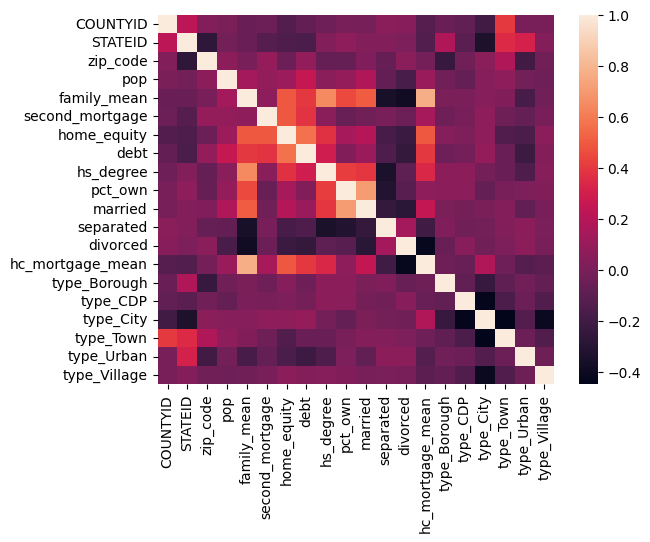

In [90]:
sns.heatmap(dfLinReg.corr())

In [91]:
#features
x = dfLinReg.drop(columns='hc_mortgage_mean')
#label
y = dfLinReg['hc_mortgage_mean']

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [93]:
from sklearn.linear_model import LinearRegression
LRM = LinearRegression()


In [94]:
LRM.fit(x_train, y_train)

LinearRegression()

In [95]:
y_pred = LRM.predict(x_test)
y_pred

array([1024.76760951, 2223.94757978, 1453.26799804, ..., 2291.12163043,
       1547.85299582, 1423.71697481])

In [96]:
LRM.score(x_test, y_test)

0.743834488969408

<AxesSubplot: ylabel='Count'>

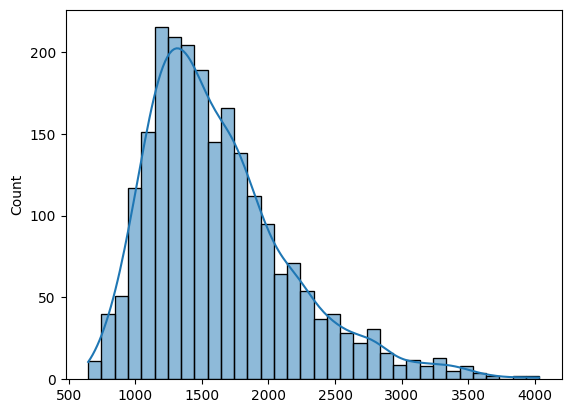

In [98]:
sns.histplot(y_pred, kde=True)